# Terrorism Hotspots


Terrorism remains a critical global concern, impacting societies, economies, and political landscapes worldwide. This analysis focuses on identifying terrorism hotspots—regions characterized by high frequencies of terrorist activities—using a comprehensive dataset spanning from 1970 to 2017. 

## Loading Data and Required Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_column', False)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False)

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist")
df.head()

C:\Users\richu\AppData\Local\Temp\ipykernel_23548\2545856775.py:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist")


,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,...,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consul

In [3]:
df.columns

Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate',
       'extended', 'resolution', 'country', 'country_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=136)

## Data Prepartion & Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, Unnamed: 0 to related
dtypes: float64(55), int64(23), object(58)
memory usage: 188.5+ MB


The dataset is huge with over 18000 records and 130+ columns.

For this project, we will be limiting our analysis to the distribution and nature of terrorist incidents recorded around the world. So let's select a subset of relevent columns to make our job easier.

In [4]:
features = ['eventid' ,'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1_txt', 'target1', 
            'natlty1_txt', 'gname', 'gsubname', 'nperps', 'weapsubtype1_txt', 'nkill', 'nkillus', 'nwound', 'iyear', 'imonth', 'country_txt', 'country',
            'city', 'region_txt', 'region', 'latitude', 'longitude', 'weaptype1', 'weaptype1_txt', 'claimed']

In [5]:
df1 = df[features]
df1.head()

,eventid,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weapsubtype1_txt,nkill,nkillus,nwound,iyear,imonth,country_txt,country,city,region_txt,region,latitude,longitude,weaptype1,weaptype1_txt,claimed
0,197000000001,1,0,1,Assassination,14,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,NaN,1.0,NaN,0.0,1970,7,Dominican Republic,58,Santo Domingo,Central America & Caribbean,2,18.456792,-69.951164,13,Unknown,NaN
1,197000000002,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,NaN,0.0,NaN,0.0,1970,0,Mexico,130,Mexico city,North America,1,19.371887,-99.086624,13,Unknown,NaN
2,197001000001,1,0,1,Assassination,10,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,NaN,1.0,NaN,0.0,1970,1,Philippines,160,Unknown,Southeast Asia,5,15.478598,120.599741,13,Unknown,NaN
3,197001000002,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Unknown Explosive Type,NaN,NaN,NaN,1970,1,Greece,78,Athens,Western Europe,8,37.997490,23.762728,6,Explosives,NaN
4,197001000003,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,Japan,101,Fukouka,East Asia,4,33.580412,130.396361,8,Incendiary,NaN


Let's view some basic information about the data frame.

In [6]:
df1.shape

(181691, 29)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   success           181691 non-null  int64  
 2   suicide           181691 non-null  int64  
 3   attacktype1       181691 non-null  int64  
 4   attacktype1_txt   181691 non-null  object 
 5   targtype1         181691 non-null  int64  
 6   targtype1_txt     181691 non-null  object 
 7   targsubtype1_txt  171318 non-null  object 
 8   target1           181053 non-null  object 
 9   natlty1_txt       180132 non-null  object 
 10  gname             181691 non-null  object 
 11  gsubname          5890 non-null    object 
 12  nperps            110576 non-null  float64
 13  weapsubtype1_txt  160923 non-null  object 
 14  nkill             171378 non-null  float64
 15  nkillus           117245 non-null  float64
 16  nwound            16

##### Checking for duplicate records

In [8]:
df1.duplicated().sum()

0

There are no duplicate records in the dataset

##### Checking for null values

In [9]:
missing_pct = df1.isnull().mean().sort_values(ascending=False).reset_index()
missing_pct.rename(columns={0:'Pct'}, inplace=True)
missing_pct = missing_pct[missing_pct['Pct'] > 0]
len(missing_pct)

13

There are 11 columns with null value present in them.

Let's remove all columns which contain more than 50% null values

In [10]:
missing_50 = missing_pct['index'][missing_pct['Pct'] > 0.50].to_list()
len(missing_50)

1

In [11]:
df2 = df1.drop(missing_50, axis=1)
df2.columns

Index(['eventid', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'nperps', 'weapsubtype1_txt', 'nkill',
       'nkillus', 'nwound', 'iyear', 'imonth', 'country_txt', 'country',
       'city', 'region_txt', 'region', 'latitude', 'longitude', 'weaptype1',
       'weaptype1_txt', 'claimed'],
      dtype='object')

Find the categorical missing values , analysis them further and find the appropriate way to deal with them.

In [12]:
missing_pct_df1 = df2.isnull().mean().sort_values(ascending=False)

cat_miss_var = df2[missing_pct_df1[missing_pct_df1 > 0].index.to_list()].select_dtypes(include="O").columns.to_list()
missing_pct_df1[cat_miss_var]

weapsubtype1_txt    0.114304
targsubtype1_txt    0.057091
natlty1_txt         0.008581
target1             0.003511
city                0.002394
dtype: float64

In [13]:
df2[cat_miss_var].mode()

,weapsubtype1_txt,targsubtype1_txt,natlty1_txt,target1,city
0,Unknown Explosive Type,Unnamed Civilian/Unspecified,Iraq,Civilians,Unknown


We will impute every categorical column with it's respective mode value.

In [14]:
for col in cat_miss_var:
    df2[col].fillna(value=df2[col].mode()[0], inplace=True)

In [15]:
df2[cat_miss_var].isnull().mean().sort_values(ascending=False)

weapsubtype1_txt    0.0
targsubtype1_txt    0.0
natlty1_txt         0.0
target1             0.0
city                0.0
dtype: float64

Now that we have dealt with categorical value let's do the same with numerical values.

In [16]:
int_miss_var = df2[missing_pct_df1[missing_pct_df1 > 0].index.to_list()].select_dtypes(include='number').columns.to_list()
missing_pct_df1[int_miss_var]

nperps       0.391406
claimed      0.363915
nkillus      0.354701
nwound       0.089773
nkill        0.056761
longitude    0.025081
latitude     0.025076
dtype: float64

In [17]:
df2[int_miss_var].describe()

,nperps,claimed,nkillus,nwound,nkill,longitude,latitude
count,110576.000000,115571.000000,117245.000000,165380.000000,171378.000000,1.771340e+05,177135.000000
mean,-65.361154,0.049666,0.045981,3.167668,2.403272,-4.586957e+02,23.498343
std,216.536633,1.093195,5.681854,35.949392,11.545741,2.047790e+05,18.569242
min,-99.000000,-9.000000,0.000000,0.000000,0.000000,-8.618590e+07,-53.154613
25%,-99.000000,0.000000,0.000000,0.000000,0.000000,4.545640e+00,11.510046
50%,-99.000000,0.000000,0.000000,0.000000,0.000000,4.324651e+01,31.467463
75%,1.000000,0.000000,0.000000,2.000000,2.000000,6.871033e+01,34.685087
max,25000.000000,1.000000,1360.000000,8191.000000,1570.000000,1.793667e+02,74.633553


In [18]:
df2[['longitude', 'latitude']].isnull().sum()

longitude    4557
latitude     4556
dtype: int64

We will remove records with longitude & latitude null values and impute every other data with 0.

In [19]:
df2.dropna(subset=['longitude', 'latitude'], inplace=True)
df2[int_miss_var] = df2[int_miss_var].fillna(value=0)
df2[int_miss_var].isnull().sum()

nperps       0
claimed      0
nkillus      0
nwound       0
nkill        0
longitude    0
latitude     0
dtype: int64

In [20]:
df2.isnull().sum().sort_values(ascending=False)

eventid             0
success             0
weaptype1_txt       0
weaptype1           0
longitude           0
latitude            0
region              0
region_txt          0
city                0
country             0
country_txt         0
imonth              0
iyear               0
nwound              0
nkillus             0
nkill               0
weapsubtype1_txt    0
nperps              0
gname               0
natlty1_txt         0
target1             0
targsubtype1_txt    0
targtype1_txt       0
targtype1           0
attacktype1_txt     0
attacktype1         0
suicide             0
claimed             0
dtype: int64

Now that we've cleaned and prepared the dataset let's proceed to the next step of this analysis.

## EDA

#### Year

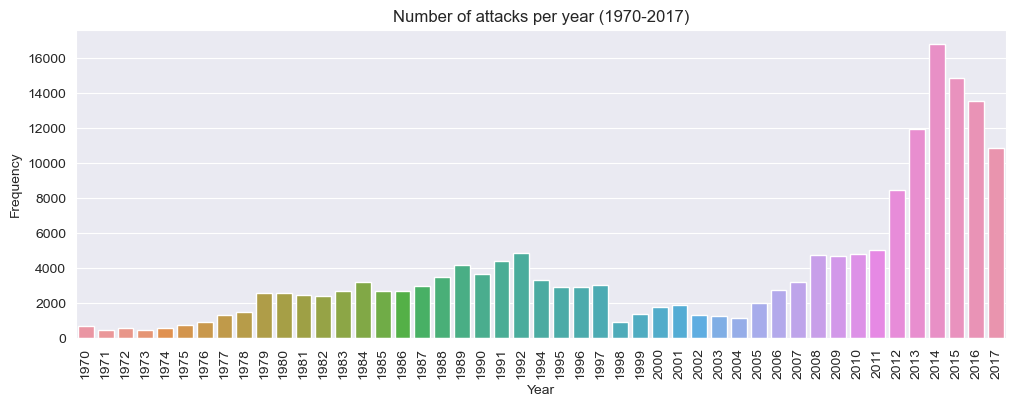

In [312]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='iyear')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of attacks per year (1970-2017)')
plt.xticks(rotation=90)
plt.show()

We can very easily say that 2014 has been the been the most active year globally. Also there is a significant increase in terrorist activites in the past decade after a low period in the early 2000s. 

#### Region

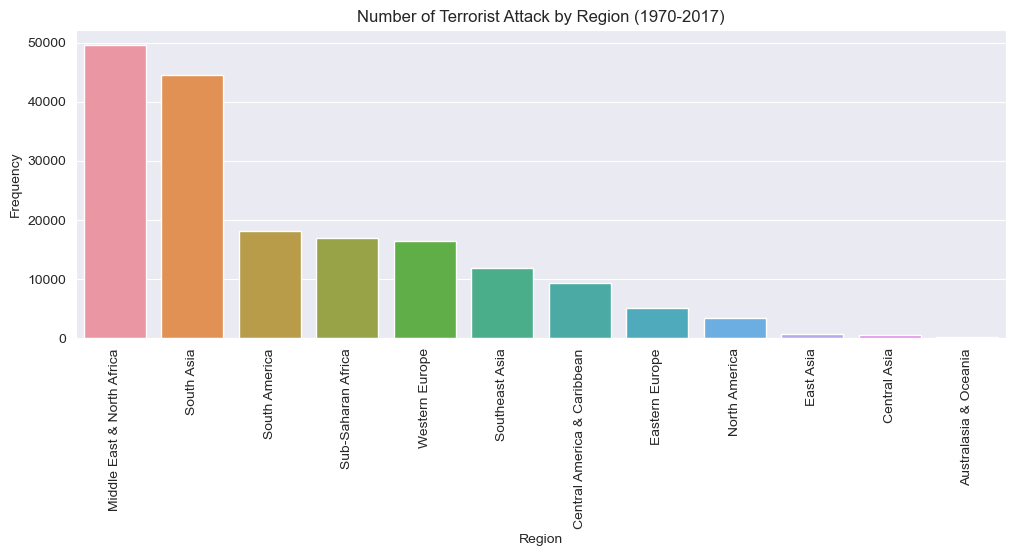

In [313]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='region_txt', order=df2['region_txt'].value_counts().index)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Number of Terrorist Attack by Region (1970-2017)')
plt.xticks(rotation=90)
plt.show()

Most number of attacks occured in Middle East & North America, followed shortly by South Asia, while Australasia & Oceania seems to be the most peaceful region.

#### Countries

In [314]:
df2.country_txt.nunique()

204

Ploting 200+ countries in a graph will be difficult task so let's take the top 20 countries and plot them.

In [315]:
cntry = df2.country_txt.value_counts().sort_values(ascending=False).reset_index()

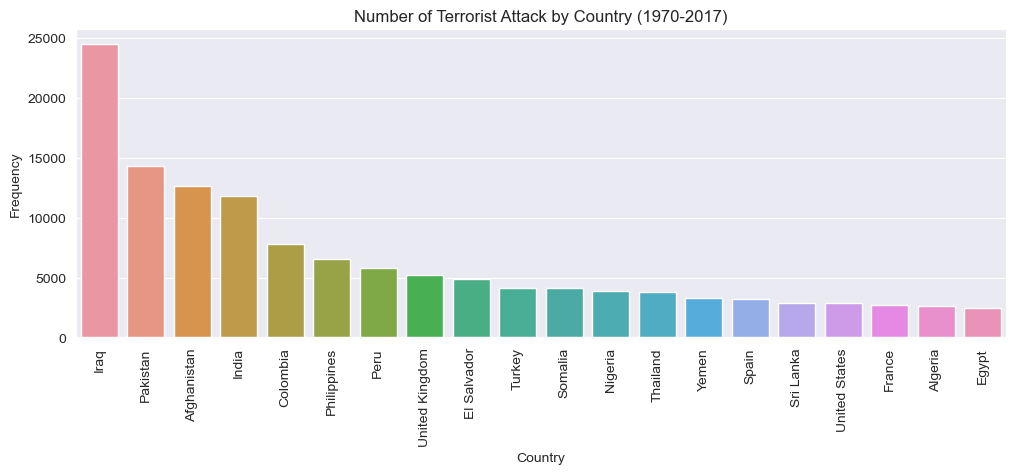

In [316]:
plt.figure(figsize=(12,4))
sns.barplot(data=cntry.head(20), x='country_txt', y = 'count')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Number of Terrorist Attack by Country (1970-2017)')
plt.xticks(rotation=90)
plt.show()

Iraq & Pakistan are the top countries.

In [317]:
for col in cntry['country_txt'].head(5):
    print(f"Country : {col} \t Region : {df2['region_txt'][df2['country_txt'] == col].mode()[0]}")

Country : Iraq 	 Region : Middle East & North Africa
Country : Pakistan 	 Region : South Asia
Country : Afghanistan 	 Region : South Asia
Country : India 	 Region : South Asia
Country : Colombia 	 Region : South America


#### Terror Group

In [318]:
df2['gname'].nunique()

3463

Since there are many terrorist groups for simplicity let's plot the top 15.

In [319]:
grps = df2['gname'].value_counts(ascending=False).reset_index()

In [320]:
grps.head(5)

,gname,count
0,Unknown,81485
1,Taliban,7457
2,Islamic State of Iraq and the Levant (ISIL),5584
3,Shining Path (SL),4306
4,Al-Shabaab,3274


We do not have information about the groups which have done huge proportion of the attacks. In order to make the graph proportate we will not be ploting the Unknown data.

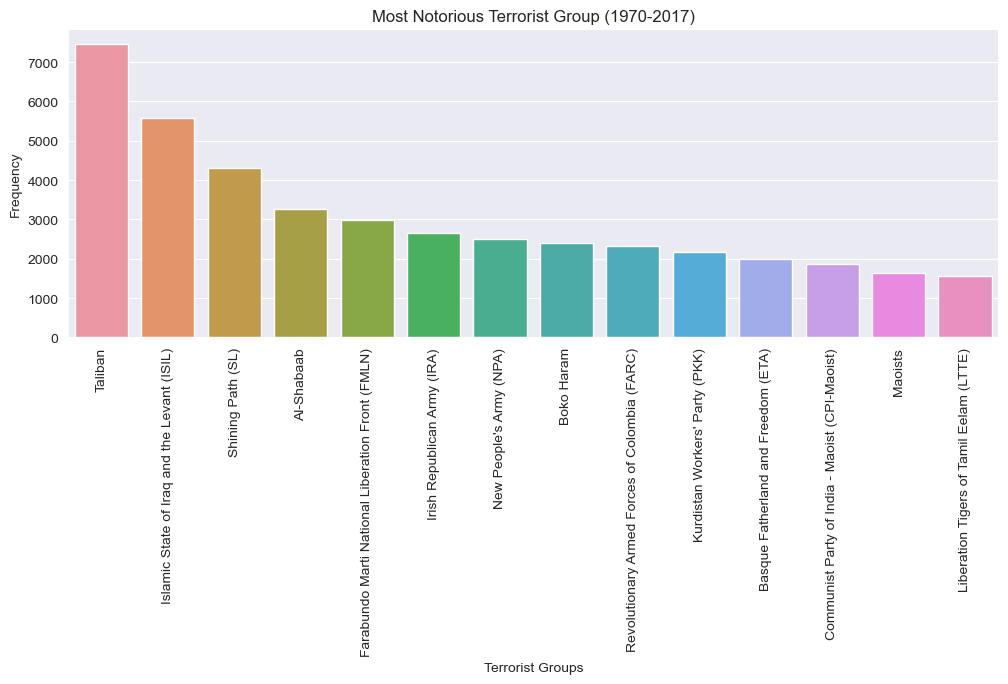

In [321]:
plt.figure(figsize=(12,4))
sns.barplot(data=grps[1:15], x='gname', y='count')
plt.xlabel('Terrorist Groups')
plt.ylabel('Frequency')
plt.title('Most Notorious Terrorist Group (1970-2017)')
plt.xticks(rotation=90)
plt.show()

It is worthwhile to note that the top countries do infact belong to regions with most activities.

#### Popular Targets

In [322]:
df2['targtype1_txt'].nunique()

22

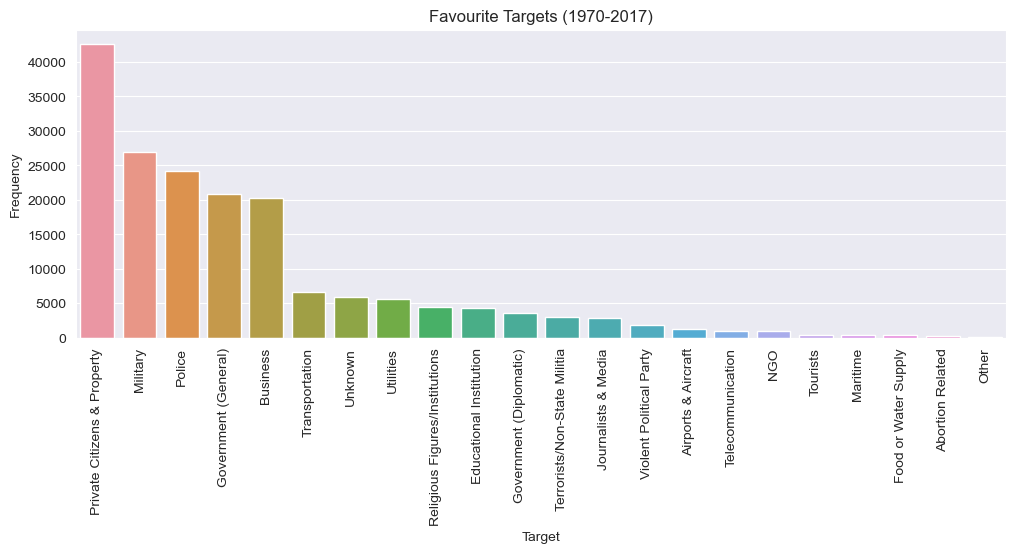

In [323]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='targtype1_txt', order=df2['targtype1_txt'].value_counts().index)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Favourite Targets (1970-2017)')
plt.xticks(rotation=90)
plt.show()

Most number of attacks have been on Private Citizens & Property followed by Military attacks.

#### Attack Type

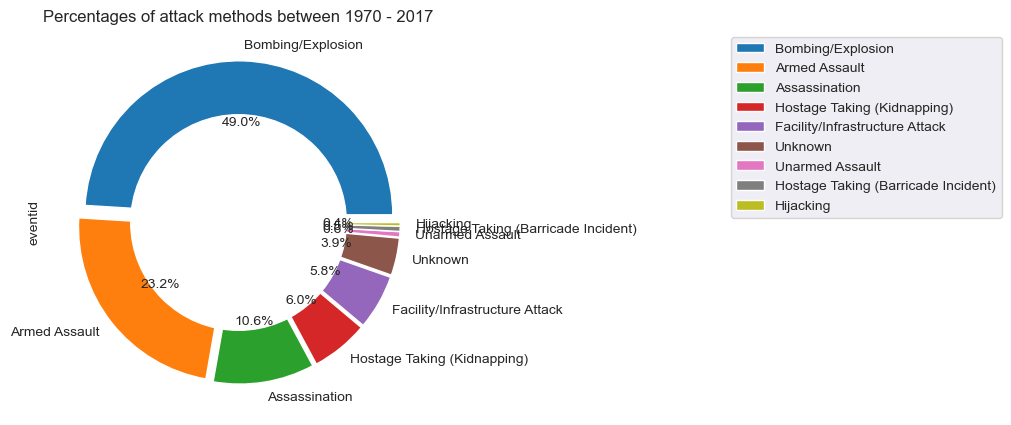

In [324]:
atk = df2.groupby(['attacktype1_txt'])['eventid'].count().sort_values(ascending=False)
plt.figure(figsize=(10,5))
atk.plot.pie(autopct= "%1.1f%%",  explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) )
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
plt.legend(atk.index, loc="upper right", bbox_to_anchor=(2, 0, 0.5, 1))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Percentages of attack methods between 1970 - 2017")
plt.show()

Bombing/Explosion has been the most frequent form of attack.

#### Weapon Types

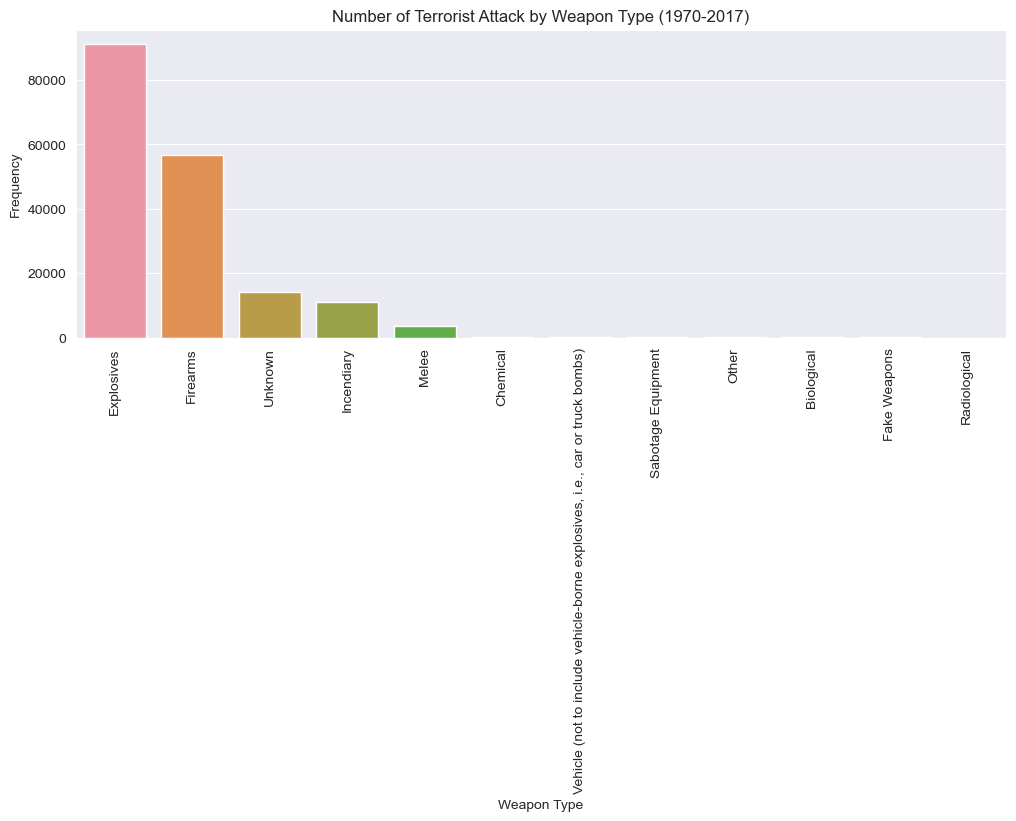

In [325]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='weaptype1_txt', order=df2['weaptype1_txt'].value_counts().index)
plt.xlabel('Weapon Type')
plt.ylabel('Frequency')
plt.title('Number of Terrorist Attack by Weapon Type (1970-2017)')
plt.xticks(rotation=90)
plt.show()

It is without surprise that the most used weapon is Explosives as Explotion is the most common method.

#### Success

In [326]:
df2['success'].nunique()

2

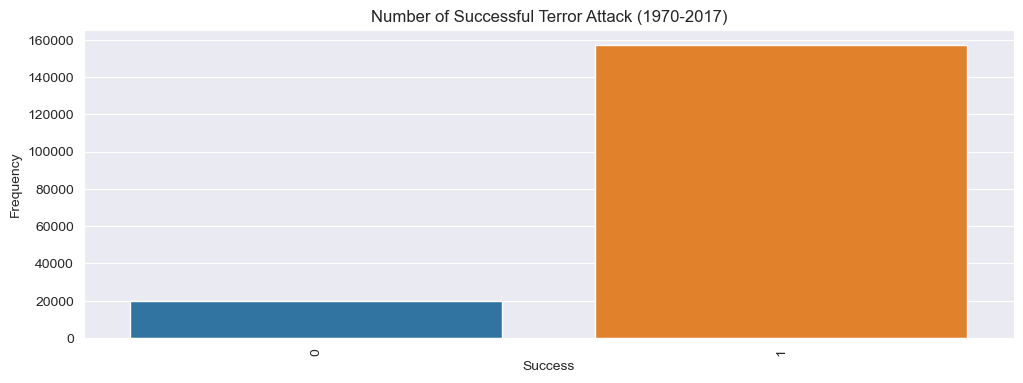

In [327]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='success')
plt.xlabel('Success')
plt.ylabel('Frequency')
plt.title('Number of Successful Terror Attack (1970-2017)')
plt.xticks(rotation=90)
plt.show()

Most of the terrorist attacks have been successful. This can indicate the failed efforts to mitigate terrorism.

#### Suicide

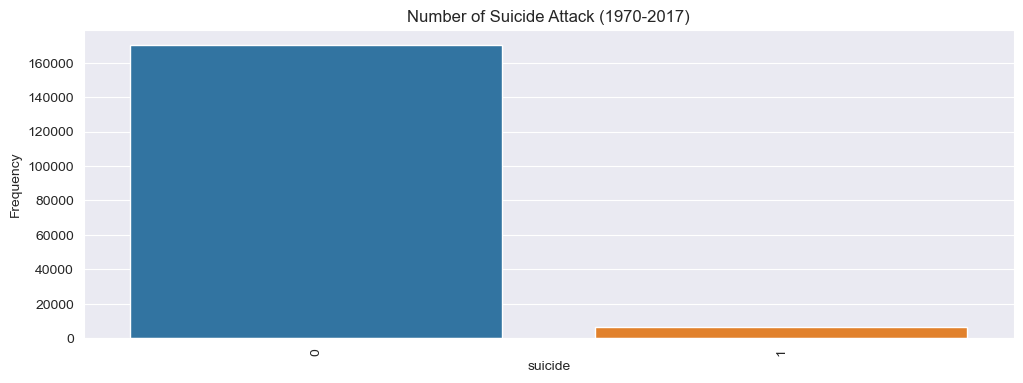

In [328]:
plt.figure(figsize=(12,4))
sns.countplot(data=df2, x='suicide')
plt.ylabel('Frequency')
plt.title('Number of Suicide Attack (1970-2017)')
plt.xticks(rotation=90)
plt.show()

Only a few proportion of attacks have been suicide.

## Asking and Answering Questions

Now that we have gained certain insights to global terrorism hotspots, let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Question 1: How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

Global Trends :
* Significant increase in terrorist activities in the past two decades after a low period in the early 2000s.
* 2014 has been the most active year.
* Middle East & North America is biggest hotspot.

These conclusions have been derived from previous analysis.

Now let's delve into the trends across different regions through the years.

In [329]:
region_per_year = df2.groupby(['iyear', 'region_txt'])['eventid'].count().reset_index()
region_per_year.rename(columns={'eventid' : 'frequency'}, inplace=True)

In [330]:
global_mean = region_per_year.groupby('iyear')['frequency'].mean().reset_index()

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

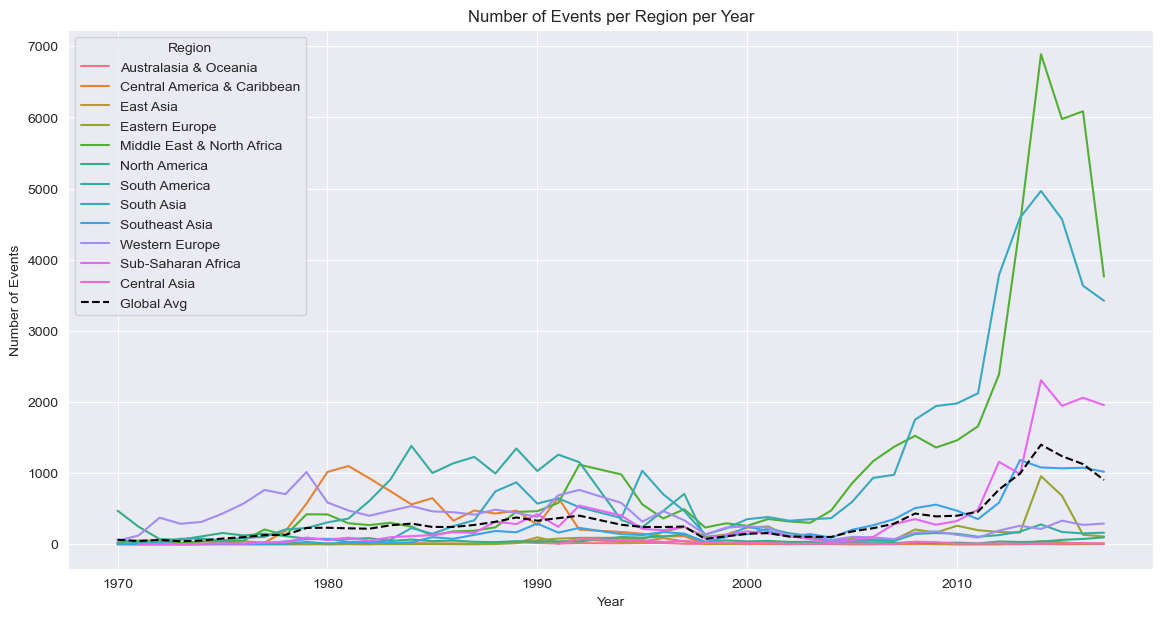

In [331]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_per_year, x='iyear', y='frequency', hue='region_txt')
sns.lineplot(data=global_mean, x='iyear', y = 'frequency', linestyle = "--", color="black", label="Global Avg")
plt.title('Number of Events per Region per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Region', loc='upper left')
plt.show()

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

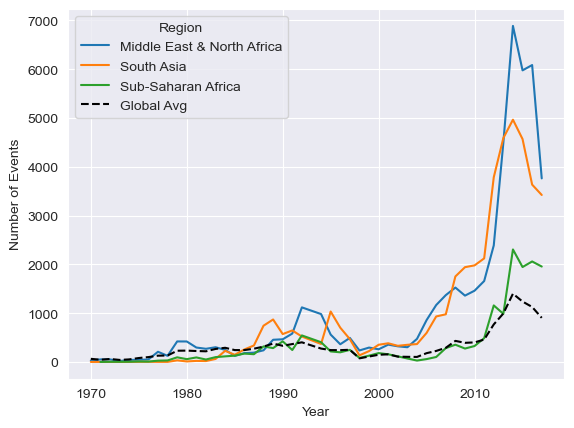

In [332]:
interest1 = ['Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']
sns.lineplot(data = region_per_year[region_per_year['region_txt'].isin(interest1)], x='iyear', y='frequency', hue='region_txt')
sns.lineplot(data=global_mean, x='iyear', y = 'frequency', linestyle = "--", color="black", label="Global Avg")
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Region', loc='upper left')
plt.show()

South Asia, Middle East & North Africa has always experienced much higher level of terriorist activities as compared to the global average, while Sub-Saharan Africa started climbing above global average around 2011.

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

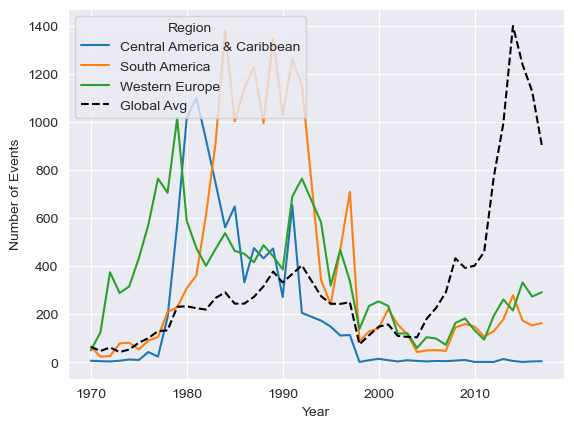

In [333]:
interest2 = ['South America', 'Western Europe', 'Central America & Caribbean']
sns.lineplot(data = region_per_year[region_per_year['region_txt'].isin(interest2)], x='iyear', y='frequency', hue='region_txt')
sns.lineplot(data=global_mean, x='iyear', y = 'frequency', linestyle = "--", color="black", label="Global Avg")
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Region', loc='upper left')
plt.show()

In complete contrast to the global trend, South America, Western Europe, Central America & Caribbeans have an increased activity in the 1980s & 1990s and have subsequently declined in the past two decades going way below the global average. A possible conclusion from this data is that measures taken by these regions to mitgate terrorism have to some extent been successful.

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

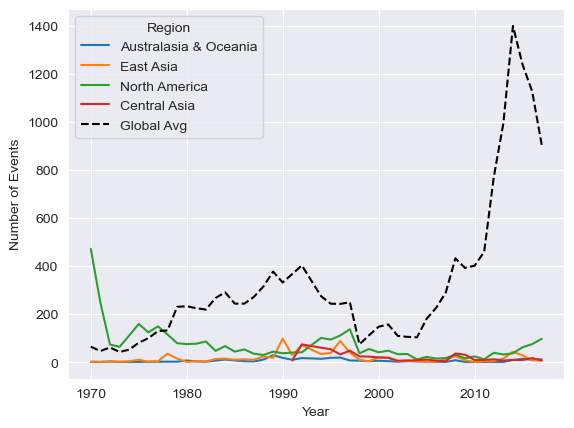

In [334]:
interest3 = ['North America', 'East Asia', 'Central Asia','Australasia & Oceania']
sns.lineplot(data = region_per_year[region_per_year['region_txt'].isin(interest3)], x='iyear', y='frequency', hue='region_txt')
sns.lineplot(data=global_mean, x='iyear', y = 'frequency', linestyle = "--", color="black", label="Global Avg")
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Region', loc='upper left')
plt.show()

North America, East Asia, Central Asia, Australasia & Oceania can be called the most peacefull regions of the world since terrorist activites are very low compared to the rest of the world except maybe North America in 1970s with activities a little above global average.

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

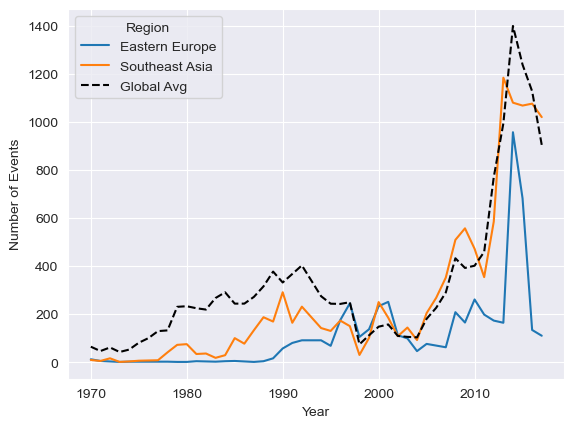

In [335]:
interest4 = ['Southeast Asia', 'Eastern Europe']
sns.lineplot(data = region_per_year[region_per_year['region_txt'].isin(interest4)], x='iyear', y='frequency', hue='region_txt')
sns.lineplot(data=global_mean, x='iyear', y = 'frequency', linestyle = "--", color="black", label="Global Avg")
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Region', loc='upper left')
plt.show()

Though, terrorism in Southeast Asia & Eastern Europe have increased significantky in the past two decades in relation with the global trend, it is slightly less than the global average.

#### Question 2: Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

In [336]:
df3 = df2.copy()

In [337]:
df3['casu'] = df3['nwound']+df3['nkill']
kills_per_region = df3.groupby('region').agg({'eventid': 'count', 'casu': 'sum'}).reset_index()
kills_per_region.rename(columns={'eventid' : 'count'}, inplace=True)

<Axes: >

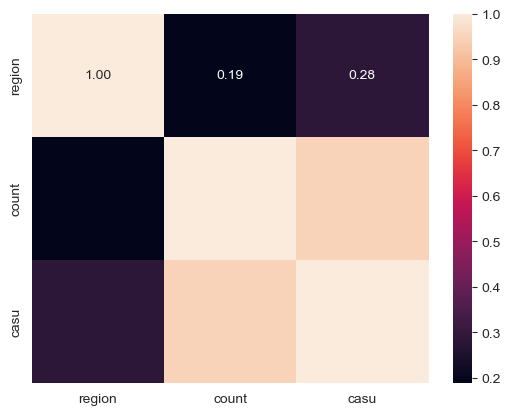

In [338]:
sns.heatmap(kills_per_region.corr(), annot=True, fmt='.2f')

Number of casualities and the number of incidents have a very high correlation value of 0.947385 when we group them by region.

#### Question 3: What are the most common methods of attacks? Does it differ in various regions or in time?

We have already seen that globally bombing is the most common method of attack.

Now let's explore if it various with region or time

In [340]:
atk_per_year = df2.groupby(['iyear', 'attacktype1_txt']).size().reset_index(name='count').sort_values(by=['iyear', 'count'], ascending=[True, False])

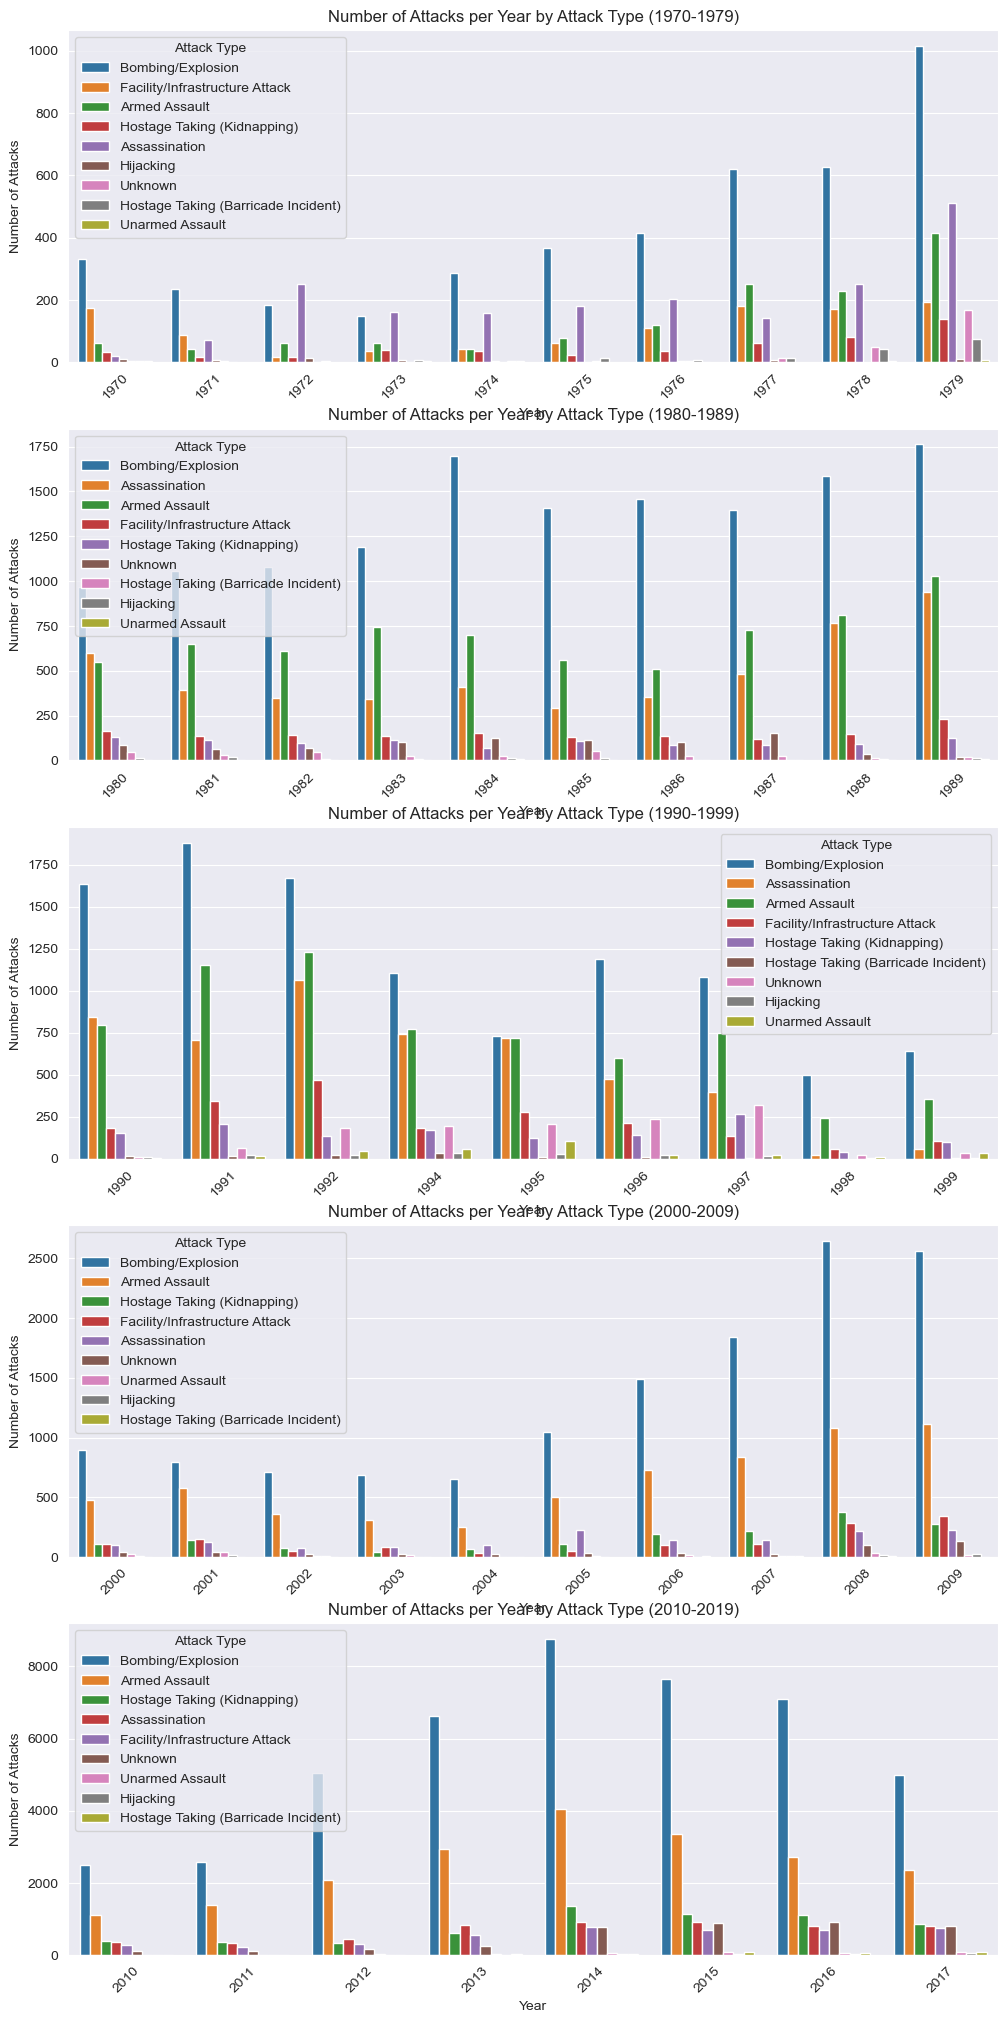

In [341]:
decades = [(1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]

plt.figure(figsize=(12, 25))
for i, (start_year, end_year) in enumerate(decades):
    decade_data = atk_per_year[(atk_per_year['iyear'] >= start_year) & (atk_per_year['iyear'] <= end_year)]
    plt.subplot(len(decades), 1, i+1)
    sns.barplot(data=decade_data, x='iyear', y='count', hue='attacktype1_txt')
    plt.title(f'Number of Attacks per Year by Attack Type ({start_year}-{end_year})')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.legend(title='Attack Type')
    plt.xticks(rotation=45)
plt.show()

45 / 47 years in the study(96%) have bombings as the most common attack type, and the 2 years where the attack types aren't bombings also have the least amount of top attacks of all the years. 

In [342]:
atk_per_region = df2.groupby(['region_txt', 'attacktype1_txt']).size().reset_index(name='count')
atk_per_region_pivot = atk_per_region.pivot(index='region_txt', columns='attacktype1_txt', values='count')

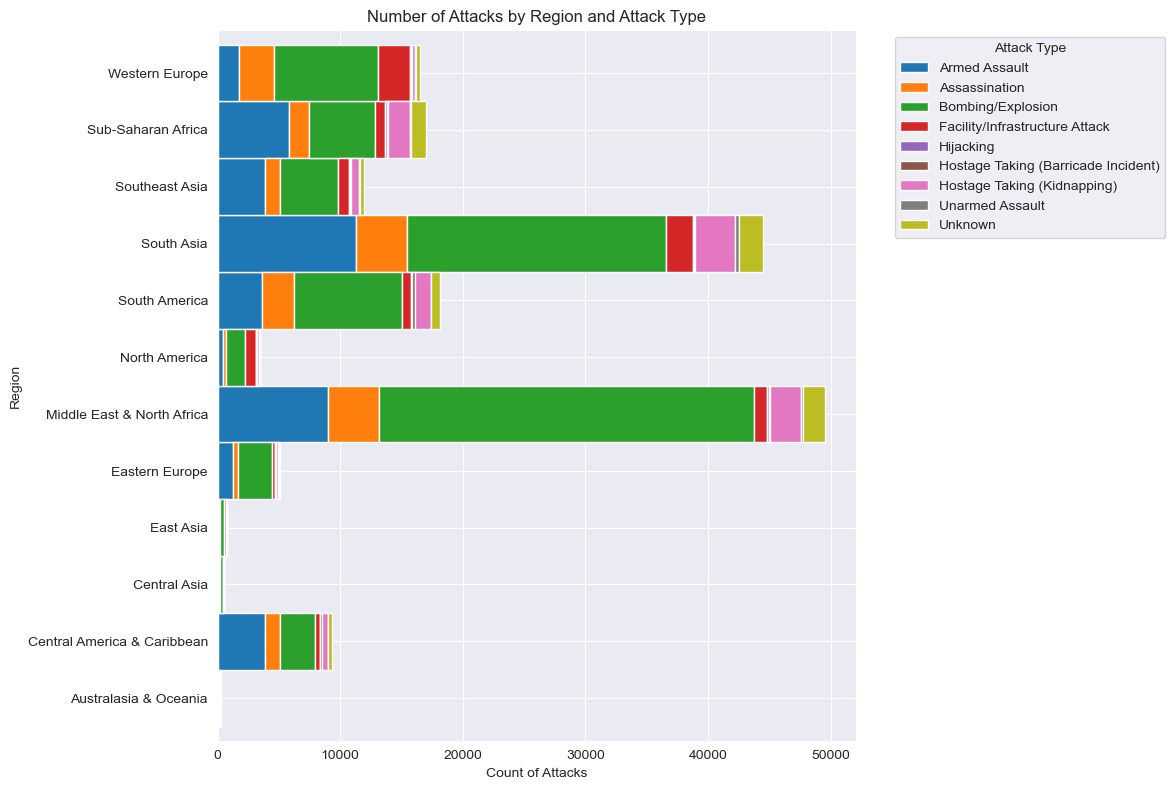

In [343]:
atk_per_region_pivot.plot(kind='barh', stacked=True, width=1)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Number of Attacks by Region and Attack Type')
plt.xlabel('Count of Attacks')
plt.ylabel('Region')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Regarding terms of regions, 5/6 regions have bombings as their most common attack type. Central America & The Caribbean have Armed Assault as its most common type, with bombings coming in second.

In [344]:
atk_kill_count = df2.groupby('attacktype1_txt')['nkill'].sum().sort_values(ascending=False).reset_index()

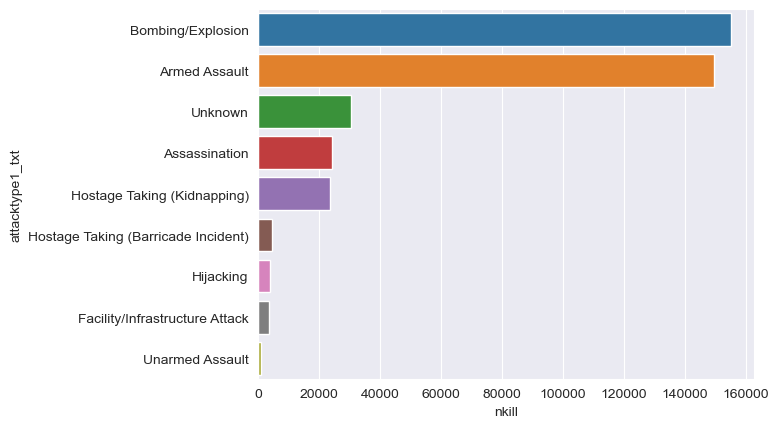

In [345]:
sns.barplot(data=atk_kill_count, y = 'attacktype1_txt', x = 'nkill')
plt.show()

Though most attacks were bombing, the most number of confirmed kills happended with Armed Assault, while Bombing follows shortly after. Armed Assault is also the second most occuring terrorist activity. 

#### Question 4: Which is the most notorious terrorist group? How has the activity of different terrorist groups varied across different regions over the years? Can you identify any patterns or significant changes in their activities?

From our earlier analysis we know that most of the terror attacks are carried out by unknown groups.

In [346]:
terror = df2.groupby(['gname'])[['eventid', 'nkill']].agg({'eventid':'count', 'nkill':'sum'}).reset_index()

In [347]:
terror.sort_values(by=['eventid'], ascending=False).head()

,gname,eventid,nkill
3335,Unknown,81485,109616.0
3073,Taliban,7457,29382.0
1505,Islamic State of Iraq and the Levant (ISIL),5584,38775.0
2891,Shining Path (SL),4306,10174.0
175,Al-Shabaab,3274,9320.0


In [348]:
terror.sort_values(by=['nkill'], ascending=False).head()

,gname,eventid,nkill
3335,Unknown,81485,109616.0
1505,Islamic State of Iraq and the Levant (ISIL),5584,38775.0
3073,Taliban,7457,29382.0
694,Boko Haram,2408,20290.0
1826,Liberation Tigers of Tamil Eelam (LTTE),1554,10733.0


Though Taliban has more terror attacks, ISIL has more kills. From this we can conclude that out of the known terror groups Taliban & ISIL are the most notorious one.

Let's go to the second part of the question and explore the trends.

In [349]:
top10 = terror.sort_values(by=['eventid'], ascending=False)['gname'][1:11]
top10 = top10.to_list()

In [350]:
terror_by_year = df2.groupby(['gname', 'iyear'])['eventid'].count().sort_values(ascending=False).reset_index()
top10_terror_by_year = terror_by_year[terror_by_year['gname'].isin(top10)]

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


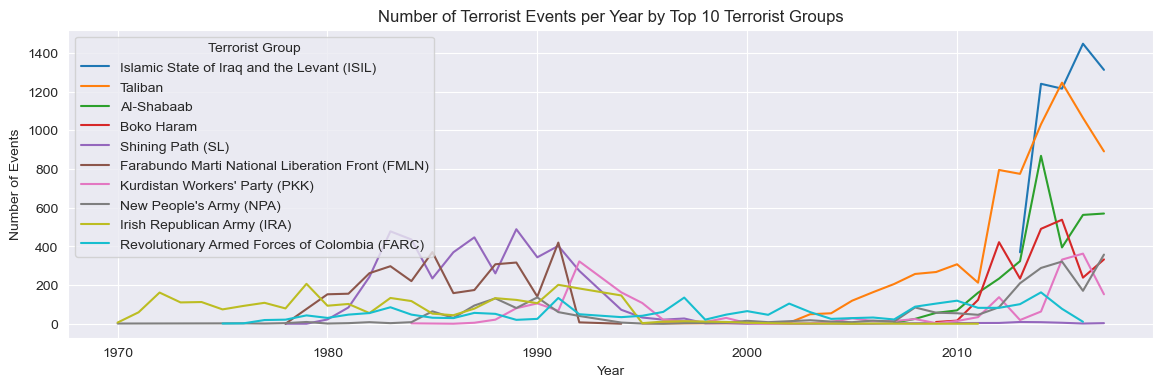

In [351]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=top10_terror_by_year, x='iyear', y='eventid', hue='gname')
plt.title('Number of Terrorist Events per Year by Top 10 Terrorist Groups')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Terrorist Group')
plt.show()

Irish Republican Army &New Peoples's Army are the oldest terror groups going as back as 1970s. NPA have not been very active even in its early days while IRA have done significant damage in the 70s & 80s and have probably stopped it's activities in the 2000s. 

Groups, such as ISIL and the Taliban, which emerged or gained prominence in the 2000s, have shown a significant increase in the number of attacks in recent years.

In [352]:
top100 = terror.sort_values(by=['eventid'], ascending=False)['gname'][1:101]
top100_terror = df[df['gname'].isin(top100)]
top100_terror_by_region = top100_terror.groupby('region_txt')['gname'].nunique().reset_index().sort_values(by = "gname", ascending=False)

As expected most of the most notorious groups operate in Middle East & North Africa.

#### Question 5: Terrorism in India

Let's explore the terrorism in India.

##### Basic Info

In [353]:
terror_ind = df2[df2['country_txt']=='India']
len(terror_ind)

11801

In [354]:
terror_ind['gname'].nunique()

298

There are a total of 11801 incidents of terror & 298 terror groups reported in India. 

##### Year

In [378]:
year_ind = terror_ind.groupby('iyear')['eventid'].count().reset_index()

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


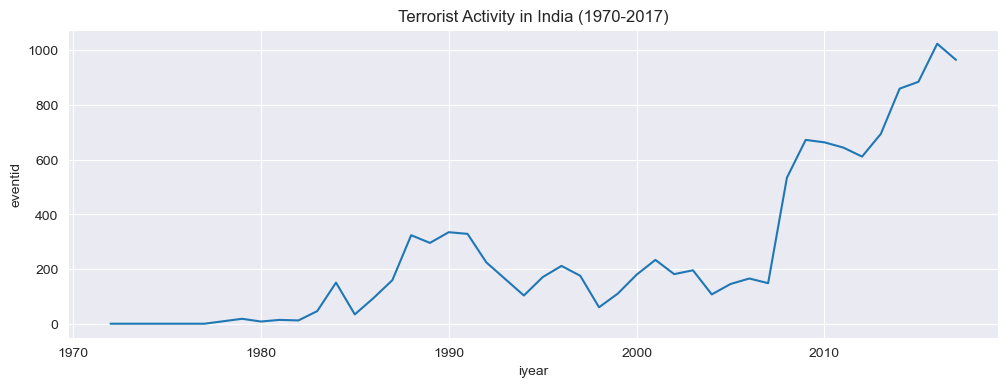

In [384]:
plt.figure(figsize=(12,4))
sns.lineplot(data=year_ind, x='iyear', y='eventid')
plt.title('Terrorist Activity in India (1970-2017)')
plt.show()

India is also seen following the global trend of increased activity in the 2010s. But we can also see a spike in attacks in 1990s contrary to global trend.

##### Terror Groups

In [368]:
ind_groups = terror_ind['gname'].value_counts()[1:11].index
ind_atk = terror_ind[terror_ind['gname'].isin(ind_groups)]

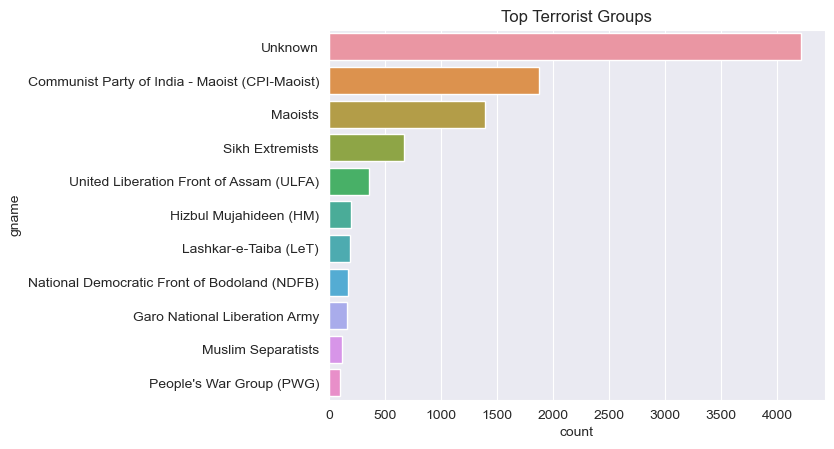

In [365]:
sns.countplot(data=ind_atk, y='gname', order=ind_groups)
plt.title('Top Terrorist Groups')
plt.show()

##### Attack Type

In [366]:
ind_atk_typ = terror_ind['attacktype1_txt'].value_counts()[0:11].index
ind_atk_typ_df = terror_ind[terror_ind['attacktype1_txt'].isin(ind_atk_typ)]

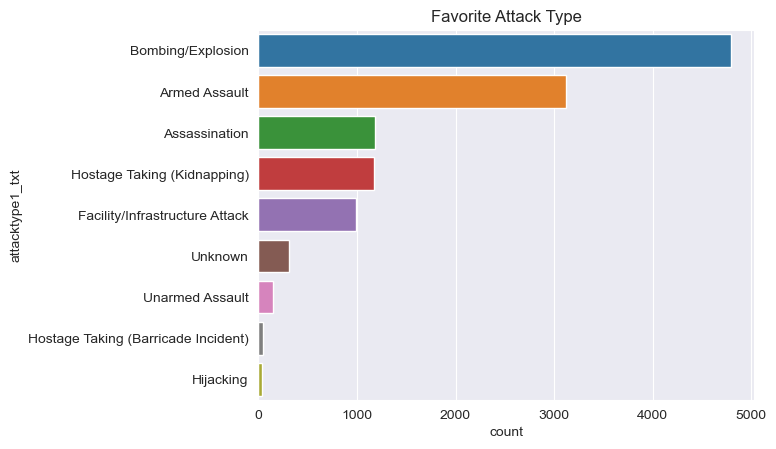

In [367]:
sns.countplot(data=ind_atk_typ_df, y='attacktype1_txt', order=ind_atk_typ)
plt.title('Favorite Attack Type')
plt.show()

In India also Bombing/Explosion is the most common attack type

##### City

In [369]:
ind_city = terror_ind['city'].value_counts()[0:11].index
ind_city_atk = terror_ind[terror_ind['city'].isin(ind_city)]

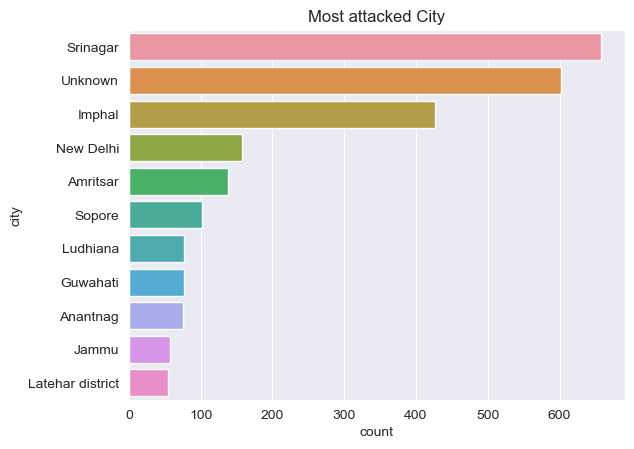

In [371]:
sns.countplot(data=ind_atk_typ_df, y='city', order=ind_city)
plt.title('Most attacked City')
plt.show()

Srinagar being the most attcked city could be due the Kashmir conflict.

## Inference & Conclusion

We've drawn many inferences and conclusion from this analysis. Here is a summary of a few of them

* Analysis identified the top 10 terrorist groups based on the number of incidents and nuber of causalities. These groups included well-known organizations such as the Taliban, ISIS, and Boko Haram. These groups collectively accounted for a significant number of incidents, emphasizing their impact on global terrorism trends.
* Significant peaks in terrorist activities during certain years correlate with major global events, such as the rise of ISIS in the mid-2010s and the increased activity of the Taliban in the early 2000s. This highlights the impact of geopolitical shifts on terrorism trends.
* The early years were characterized by localized terrorist activities, often driven by separatist and ideological groups such as the Irish Republican Army (IRA), while the 2000s show a noticeable shift towards more organized and globally-oriented terrorism. 2014 was the most active year of all.
* Countries like Iraq, Afghanistan, Pakistan, and Nigeria need continued focus due to persistent terrorist threats.
* Bombings/Explosions is the most common attack type globally, indicating a preference for methods that can cause mass casualties and widespread damage while Armed Assaults is the second most common attack type, indicating the frequent use of firearms and other weapons to carry out attacks. This type is prevalent in regions with active insurgencies and conflicts.
*  India remains a significant target for terrorist activities, with specific groups like Maoists and Sikh extremist showing high levels of activity.The frequent targeting of cities like Srinagar, New Delhi, and Imphal underscores the need for enhanced security measures in these high-risk areas.